In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pickle
import os
import matplotlib.pyplot as plt
from striatum.bandit import linthompsamp
from utils.data import *
from utils.policy import *
plt.style.use('seaborn')

In [3]:
DATA_DIR = os.path.abspath('../../Data/yahoo!_front_page_today_module_user_click_log/R6')
DATA_FILE_NAMES = ['ydata-fp-td-clicks-v1_0.2009050{}.gz'.format(str(d + 3)) for d in range(7)]
MODEL_DIR = os.path.abspath('models')

In [4]:
data_paths = []
for data_file in DATA_FILE_NAMES:
    data_paths.append(os.path.join(DATA_DIR, data_file))

In [5]:
data_file_paths = []
for data_file_name in DATA_FILE_NAMES:
    data_file_paths.append(os.path.join(DATA_DIR, data_file_name))

In [6]:
n_fit = 1600000
policy_learner = PolicyLearner(linthompsamp.LinThompSamp, context_dimension=41, delta=0.25, R=0.001,
                               epsilon=(1.0 / np.log(n_fit)), random_state=0, seed=0, reset_freq=100000)
param_grid = {'data_size': [0.01, 0.05, 0.1, 0.2, 0.3, 1.0]}

In [7]:
res = search_param(policy_learner, param_grid, parse_data, data_paths=data_paths, share_context=True)

Parameters: {'data_size': 0.01} | Average Reward: 4.6639% | Computation Time: 10:36:31
Parameters: {'data_size': 0.05} | Average Reward: 4.7803% | Computation Time: 10:23:51
Parameters: {'data_size': 0.1} | Average Reward: 4.8524% | Computation Time: 10:31:58
Parameters: {'data_size': 0.2} | Average Reward: 4.9071% | Computation Time: 10:28:19
Parameters: {'data_size': 0.3} | Average Reward: 4.7304% | Computation Time: 10:30:07
Parameters: {'data_size': 1.0} | Average Reward: 5.0219% | Computation Time: 10:55:43


In [8]:
if not os.path.isdir(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [9]:
with open(os.path.join(MODEL_DIR, 'model_linthompsamp.pkl'), 'wb') as file:
    pickle.dump(res, file)

In [10]:
with open(os.path.join(MODEL_DIR, 'model_linthompsamp.pkl'), 'rb') as file:
    res = pickle.load(file)

Best Parameter: {'data_size': 1.0}
Cumulative CTR: 5.0219%


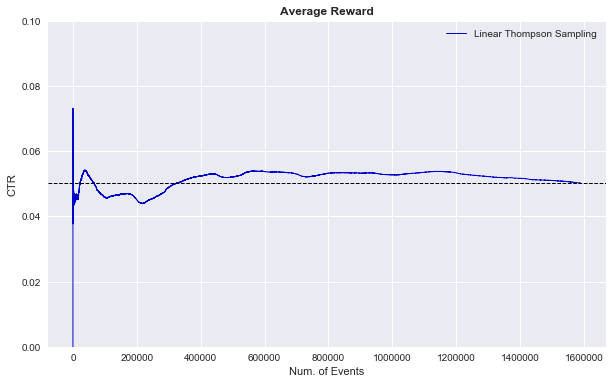

In [11]:
best_param = res['param'][np.argmax(res['avg_reward'])]
cum_ctr = np.max(res['avg_reward'])
print('Best Parameter: {0}\nCumulative CTR: {1:0.4%}'.format(best_param, cum_ctr))
fig, ax = plt.subplots(figsize=(10, 6))
_ = ax.plot(res['seq_avg_reward'][np.argmax(res['avg_reward'])], color='mediumblue', 
            label='Linear Thompson Sampling', linewidth=1)
ax.axhline(y=cum_ctr, color='black', linestyle='--', linewidth=1)
ax.set_xlabel('Num. of Events')
ax.set_ylabel('CTR')
ax.set_ylim([0.0, 0.1])
ax.legend(loc='best')
_ = ax.set_title('Average Reward', fontsize=12, fontweight='bold')